### Objective  

**Hybrid approach**

In [1]:
import pandas as pd
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

> retrieve data

In [2]:
data = pd.read_csv('./cache/3-all_cat_clean.csv')
data

,ODATEDW,AGE,NUMCHLD,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,STATE,MAILCODE,MDMAUD,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,NOEXCH,DOMAIN_B,TCODE,DOB,INCOME,WEALTH1,HPHONE_D,RFA_2F,CLUSTER2
0,8901,60.000000,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,9512,8911,4.0,7.741935,95515,0,0.0,IL,A,XXXX,36,U,F,U,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,C,T,0,2,0,3712,5.0,9.0,0,4,39.0
1,9401,46.000000,1.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,

> check state of imbalance

In [3]:
data['TARGET_B'].value_counts()

TARGET_B
0    90569
1     4843
Name: count, dtype: int64

> train-test-split, upsample only on test set 

In [4]:
features = pd.DataFrame(data.drop(['TARGET_B', 'TARGET_D'], axis=1))
labels = pd.DataFrame(data['TARGET_B'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0)

> concat x_train and y_train to be able to resample

In [6]:
concatenated_train = pd.concat([X_train, y_train], axis=1)
majority = concatenated_train[concatenated_train['TARGET_B'] == 0]
minority = concatenated_train[concatenated_train['TARGET_B'] == 1]
display(majority.shape)
display(minority.shape)

(67970, 366)

(3589, 366)

In [7]:
target_size = (len(majority) + len(minority)) // 2

# Oversample minority class
minority_oversampled = resample(minority, replace=True, n_samples=target_size)

# Undersample majority class
majority_undersampled = resample(majority, replace=False, n_samples=target_size)

# Combine the samples
data_balanced = pd.concat([majority_undersampled, minority_oversampled], axis=0)

# Split features and target
X_balanced = data_balanced.drop(columns=['TARGET_B'])
y_balanced = data_balanced['TARGET_B']

# Continue with your preprocessing steps and model training


In [8]:
print(minority_oversampled.shape)
print(majority_undersampled.shape)

(35779, 366)
(35779, 366)


> concat both groups

In [9]:
data_upsampled = pd.concat([majority_undersampled, minority_oversampled], axis=0)
data_upsampled['TARGET_B'].value_counts()

TARGET_B
0    35779
1    35779
Name: count, dtype: int64

In [10]:
X_train = data_upsampled.drop(columns=['TARGET_B'])
y_train = data_upsampled['TARGET_B']

In [11]:
train_num = X_train.select_dtypes(include=['number'])
train_cat = X_train.select_dtypes(include=['object'])
test_num = X_test.select_dtypes(include=['number'])
test_cat = X_test.select_dtypes(include=['object'])

scaler = MinMaxScaler()
scaler.fit(train_num)

scaled_train_num = scaler.transform(train_num)
scaled_train_num = pd.DataFrame(scaled_train_num, columns=train_num.columns)

scaled_test_num = scaler.transform(test_num)
scaled_test_num = pd.DataFrame(scaled_test_num, columns=test_num.columns)

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(train_cat)

encoded_train_cat = encoder.transform(train_cat)
encoded_test_cat = encoder.transform(test_cat)

encoded_train_cat = pd.DataFrame(encoded_train_cat, columns=train_cat.columns)
encoded_test_cat = pd.DataFrame(encoded_test_cat, columns=test_cat.columns)

X_train = pd.concat([scaled_train_num, encoded_train_cat], axis=1)
X_test = pd.concat([scaled_test_num, encoded_test_cat], axis=1)

In [12]:
y_train = y_train.values.ravel()
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
accuracy = logistic_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6174904624156291


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.518341307814992

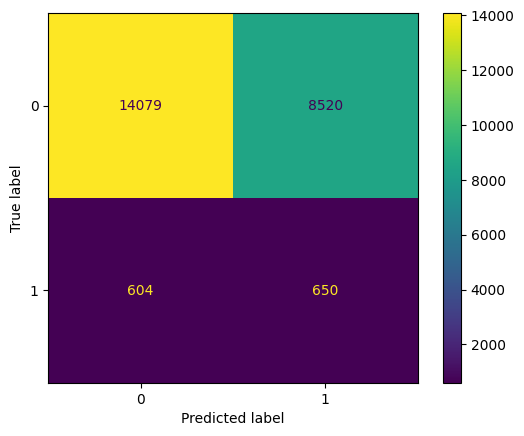

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score
predictions = logistic_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
cm_display.plot()

recall = recall_score(y_test, predictions)
display(recall)

> best one! 